In [1]:
#Step 1: Displaying of IRIS Flowers Dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error
d=pd.read_csv('IRIS_task3.csv')
d

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
d.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
#Step 2: Data Analysis and Data Wrangling
d['species']=d['species'].map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})
d
#For easy analysis '1' denotes Iris-setosa, '2' denotes Iris-versicolor and '3' denotes Iris-virginica

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


<Axes: xlabel='sepal_length', ylabel='count'>

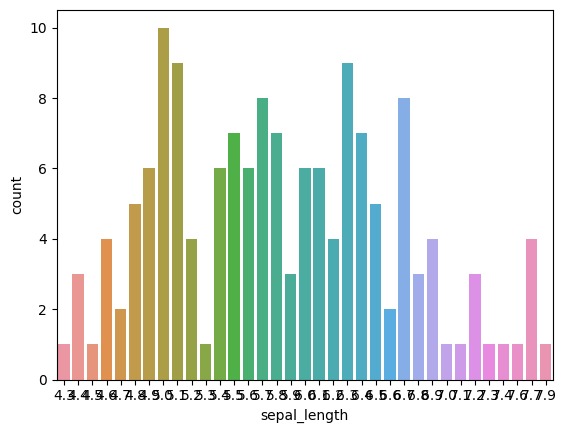

In [4]:
#visualise relationships
import seaborn as  sns
sns.countplot(x='sepal_length',data=d)

<Axes: xlabel='sepal_width', ylabel='count'>

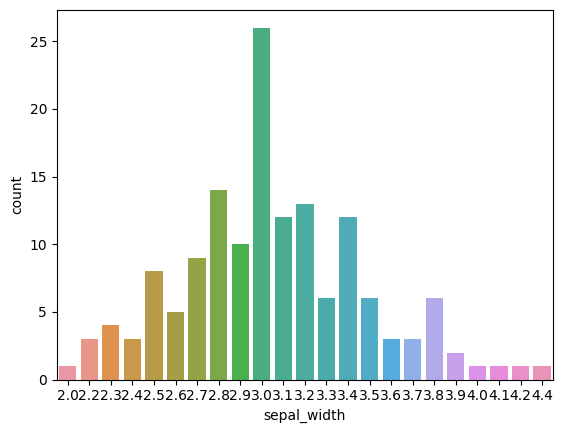

In [5]:
sns.countplot(x='sepal_width',data=d)

<Axes: xlabel='petal_length', ylabel='count'>

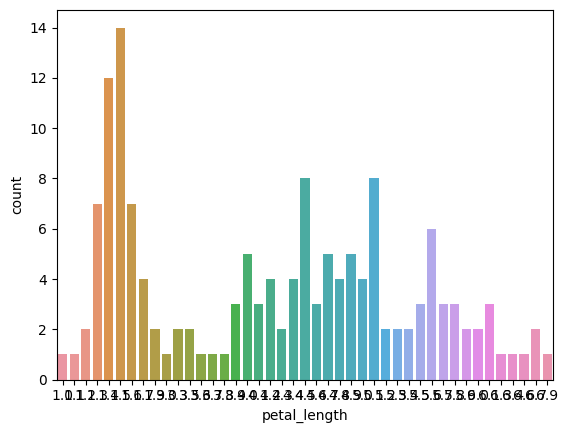

In [6]:
sns.countplot(x='petal_length',data=d)

<Axes: xlabel='petal_width', ylabel='count'>

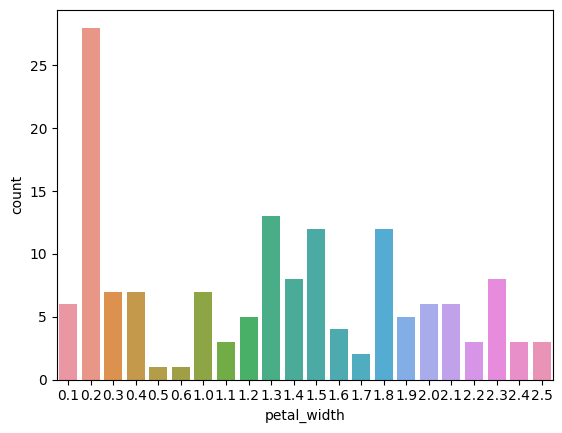

In [7]:

sns.countplot(x='petal_width',data=d)

In [8]:
#Step 3: Train The Data
x=d.drop('species',axis=1)
y=d['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
#By using the Standard Scaler function we need to first preprocess before performing the predictions

In [10]:
#Step 4:Designing a Prediction MOdel
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)

In [11]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
prediction=model.predict(x_test)

In [13]:
acc=accuracy_score(y_test,prediction)
clas=classification_report(y_test,prediction)
acc,clas

(0.9333333333333333,
 '              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        10\n           2       0.91      0.91      0.91        11\n           3       0.89      0.89      0.89         9\n\n    accuracy                           0.93        30\n   macro avg       0.93      0.93      0.93        30\nweighted avg       0.93      0.93      0.93        30\n')

In [14]:
rmse=np.sqrt(mean_squared_error(y_test,prediction))         

In [15]:
rmse

0.2581988897471611

In [16]:
#After Designing the Model,Perform few examples to check what the type of flowers based on the given values
nd=pd.DataFrame({'sepal_length':[1.1],'sepal_width':[2.1],'petal_length':[1.1],'petal_width':[2.1]})
x=model.predict(nd)
if(x==1):
    print('Iris-setosa')
elif(x==2):
    print('Iris-versicolor')
else:
    print('Iris-virginica')

Iris-setosa


In [17]:
nd=pd.DataFrame({'sepal_length':[3.1],'sepal_width':[2.1],'petal_length':[3.1],'petal_width':[4.1]})
x=model.predict(nd)
if(x==1):
    print('Iris-setosa')
elif(x==2):
    print('Iris-versicolor')
else:
    print('Iris-virginica')

Iris-versicolor


In [18]:
nd=pd.DataFrame({'sepal_length':[5.1],'sepal_width':[2.1],'petal_length':[6.1],'petal_width':[2.1]})
x=model.predict(nd)
if(x==1):
    print('Iris-setosa')
elif(x==2):
    print('Iris-versicolor')
else:
    print('Iris-virginica')

Iris-virginica
